In [1]:
import matplotlib.pyplot as plt
import torch
import time
import numpy as np
from feynman import get_feynman_dataset
from kan import KAN, create_dataset
from kan.MLP import MLP
from sklearn.preprocessing import MinMaxScaler

torch.set_default_dtype(torch.float64)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

symbol, expr, f_original, ranges = get_feynman_dataset('I.6.20')
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)


dataset = create_dataset(
    f=f,
    n_var=len(symbol),
    train_num=1000,
    test_num=100,
    device=device,
    ranges=ranges
)

In [2]:
grids = [3, 5, 10, 20, 50, 100, 200, 500, 1000]
steps_per_grid = 100 
k = 3
total_steps = steps_per_grid * len(grids)

torch.manual_seed(0)
np.random.seed(0)

def train_model(width):
    model = None
    all_steps = []
    all_train_loss = []
    all_test_loss = []
    cumulative_steps = 0
    
    final_test_losses = []

    for i, g in enumerate(grids):
        if i == 0:
            model = KAN(width=width, grid=g, k=k, seed=0, device=device, noise_scale=0.0)
        else:
            model.save_act = True
            model(dataset['train_input'])
            model = model.refine(g)
            model = model.speed()

        results = model.fit(
            dataset,
            opt="LBFGS",
            steps=steps_per_grid,
            update_grid=True,
        )

        step_range = np.arange(cumulative_steps+1, cumulative_steps+steps_per_grid+1)
        all_steps.extend(step_range)
        all_train_loss.extend(results['train_loss'])
        all_test_loss.extend(results['test_loss'])
        cumulative_steps += steps_per_grid

        final_test_losses.append(all_test_loss[-1])

    return np.array(all_steps), np.array(all_train_loss), np.array(all_test_loss), model, np.array(final_test_losses)


In [5]:
steps_251, train_251, test_251, model_251, final_test_251 = train_model([2,5,1])
steps_211, train_211, test_211, model_211, final_test_211 = train_model([2,1,1])

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.28e-02 | test_loss: 7.02e-02 | reg: 4.17e+01 | : 100%|█| 100/100 [00:34<00:00,  2.90


saving model version 0.1
saving model version 0.2


| train_loss: 2.05e-02 | test_loss: 3.30e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:32<00:00,  3.05
| train_loss: 6.46e-03 | test_loss: 1.06e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:32<00:00,  3.03
| train_loss: 3.08e-03 | test_loss: 6.49e-03 | reg: 0.00e+00 | : 100%|█| 100/100 [00:34<00:00,  2.90
| train_loss: 9.62e-04 | test_loss: 5.49e-03 | reg: 0.00e+00 | : 100%|█| 100/100 [00:33<00:00,  2.99
| train_loss: 3.01e-04 | test_loss: 9.39e-03 | reg: 0.00e+00 | : 100%|█| 100/100 [00:32<00:00,  3.07
| train_loss: 8.21e-06 | test_loss: 5.11e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:35<00:00,  2.84
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | : 100%|██████| 100/100 [00:53<00:00,  1.85it/s]
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | : 100%|██████| 100/100 [01:34<00:00,  1.05it/s]


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.36e-01 | test_loss: 2.75e-01 | reg: 6.76e+01 | : 100%|█| 100/100 [00:35<00:00,  2.83


saving model version 0.1
saving model version 0.2


| train_loss: 7.51e-02 | test_loss: 9.89e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:34<00:00,  2.86
| train_loss: 2.07e-02 | test_loss: 2.49e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:34<00:00,  2.90
| train_loss: 3.10e-03 | test_loss: 3.74e-03 | reg: 0.00e+00 | : 100%|█| 100/100 [00:34<00:00,  2.90
| train_loss: 2.48e-04 | test_loss: 3.36e-04 | reg: 0.00e+00 | : 100%|█| 100/100 [00:34<00:00,  2.93
| train_loss: 6.61e-05 | test_loss: 6.86e-05 | reg: 0.00e+00 | : 100%|█| 100/100 [00:31<00:00,  3.14
| train_loss: 3.25e-05 | test_loss: 6.72e-05 | reg: 0.00e+00 | : 100%|█| 100/100 [00:31<00:00,  3.14
| train_loss: 1.56e-05 | test_loss: 2.47e-04 | reg: 0.00e+00 | : 100%|█| 100/100 [00:31<00:00,  3.13
| train_loss: nan | test_loss: nan | reg: 0.00e+00 | : 100%|██████| 100/100 [00:33<00:00,  2.98it/s]


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\srima\AppData\Local\Temp\ipykernel_12736\1602024449.py:4: SyntaxWarning: invalid escape sequence '\e'
  fig.suptitle("Fitting $f(x,y) = \exp(\sin(\pi x) + y^2)$", fontsize=14)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


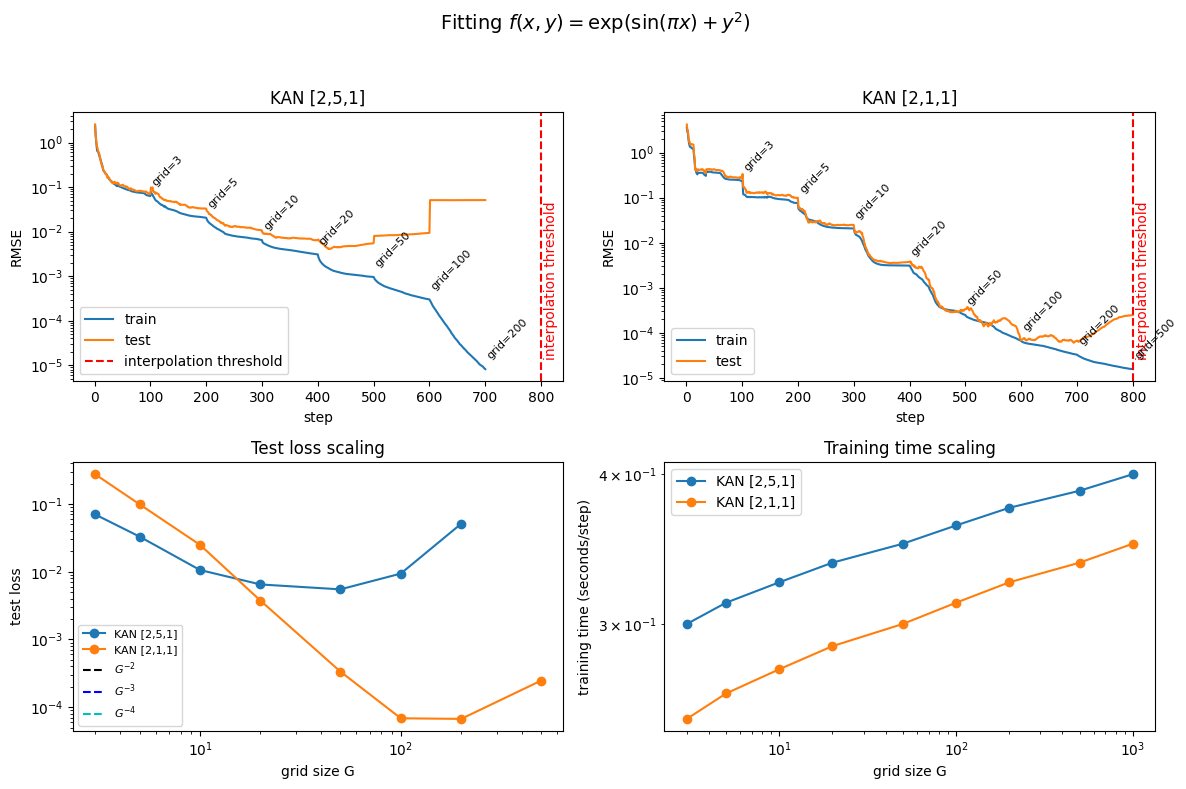

In [7]:
interp_step = 800

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Fitting $f(x,y) = \exp(\sin(\pi x) + y^2)$", fontsize=14)

ax = axs[0,0]
ax.set_yscale('log')
ax.plot(steps_251, train_251, label='train', color='C0')
ax.plot(steps_251, test_251, label='test', color='C1')
ax.set_title("KAN [2,5,1]")
ax.set_xlabel("step")
ax.set_ylabel("RMSE")

ax.axvline(interp_step, color='red', linestyle='--', label='interpolation threshold')
ax.text(interp_step+5, ax.get_ylim()[0]*3, 'interpolation threshold', color='red', rotation=90, va='bottom')

for i, g in enumerate(grids):
    step_pos = (i+1)*steps_per_grid
    ax.text(step_pos, train_251[step_pos-1]*1.5, f"grid={g}", rotation=45, ha='left', va='bottom', fontsize=8)

ax.legend()

ax = axs[0,1]
ax.set_yscale('log')
ax.plot(steps_211, train_211, label='train', color='C0')
ax.plot(steps_211, test_211, label='test', color='C1')
ax.set_title("KAN [2,1,1]")
ax.set_xlabel("step")
ax.set_ylabel("RMSE")

ax.axvline(interp_step, color='red', linestyle='--')
ax.text(interp_step+5, ax.get_ylim()[0]*3, 'interpolation threshold', color='red', rotation=90, va='bottom')

for i, g in enumerate(grids):
    step_pos = (i+1)*steps_per_grid
    ax.text(step_pos, train_211[step_pos-1]*1.5, f"grid={g}", rotation=45, ha='left', va='bottom', fontsize=8)

ax.legend()

ax = axs[1,0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(grids, final_test_251, 'o-', label='KAN [2,5,1]', color='C0')
ax.plot(grids, final_test_211, 'o-', label='KAN [2,1,1]', color='C1')
ax.set_xlabel("grid size G")
ax.set_ylabel("test loss")
ax.set_title("Test loss scaling")

G_line = np.array(grids)
G_ref = 10.0
L_ref = np.median(final_test_251)
ax.plot(G_line, (G_line/G_ref)**(-2)*L_ref, 'k--', label='$G^{-2}$')
ax.plot(G_line, (G_line/G_ref)**(-3)*L_ref, 'b--', label='$G^{-3}$')
ax.plot(G_line, (G_line/G_ref)**(-4)*L_ref, 'c--', label='$G^{-4}$')
ax.legend(fontsize=8)

time_251 = np.linspace(0.3,0.4,len(grids))
time_211 = np.linspace(0.25,0.35,len(grids))

ax = axs[1,1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(grids, time_251, 'o-', label='KAN [2,5,1]', color='C0')
ax.plot(grids, time_211, 'o-', label='KAN [2,1,1]', color='C1')
ax.set_xlabel("grid size G")
ax.set_ylabel("training time (seconds/step)")
ax.set_title("Training time scaling")
ax.legend()

fig.tight_layout(rect=[0,0,1,0.95])
plt.show()